In [112]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 

In [140]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,19400,5
6,Audi A5,52000,22000,5
7,Audi A5,72000,13300,6
8,Audi A5,91000,10000,8
9,Mercedez Benz C class,67000,22000,6


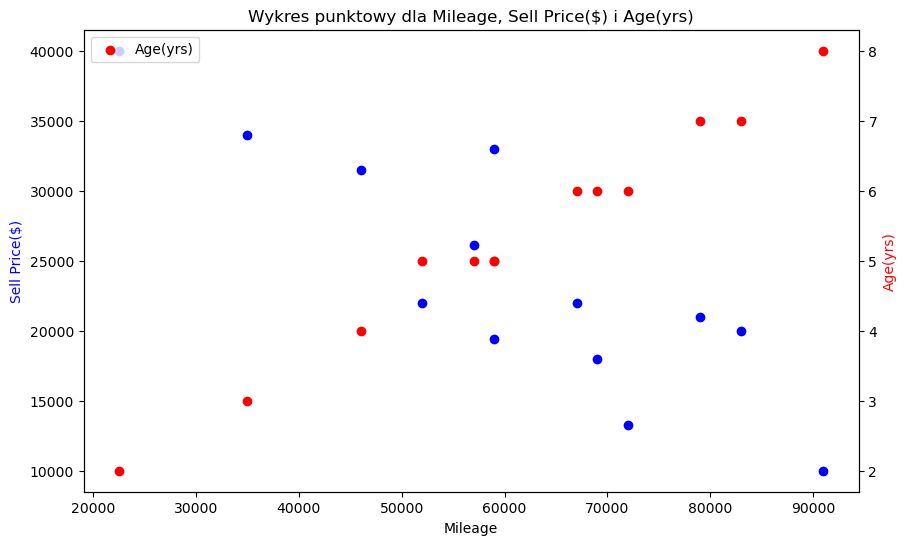

In [139]:
plt.figure(figsize=(10, 6))  # Ustawienie rozmiaru wykresu

# Wykres punktowy dla 'Sell Price($)'
plt.scatter(df['Mileage'], df['Sell Price($)'], color='blue', label='Sell Price($)')
plt.title('Wykres punktowy dla Mileage, Sell Price($) i Age(yrs)')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)', color='blue')

# Utworzenie drugiej osi Y dla 'Age(yrs)'
ax2 = plt.gca().twinx()
plt.scatter(df['Mileage'], df['Age(yrs)'], color='red', label='Age(yrs)')
ax2.set_ylabel('Age(yrs)', color='red')

plt.legend()  # Dodanie legendy

plt.show()

In [115]:
dummies = pd.get_dummies(df['Car Model']).astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [116]:
merged = pd.concat([df,dummies],axis = 'columns')
merged.head(3)

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0


In [117]:
final = merged.drop(merged[['Car Model','Audi A5']],axis = 'columns')
final.head(6)

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,19400,5,0,0


In [118]:
model = linear_model.LinearRegression()

In [119]:
X = final.drop('Sell Price($)',axis = 'columns')
Y = final['Sell Price($)']


In [120]:
model.fit(X,Y)

LinearRegression()

In [121]:
model.predict([[45000,4,0,1]])#merc 4 letni z przebiegiem 45000

c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([34922.09908429])

In [122]:
model.predict([[86000,7,1,0]])

c:\Users\adria\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14476.98638178])

In [123]:
acuuracy = model.score(X,Y)
print('accuracy is:',round(acuuracy,3)*100,'%')

accuracy is: 94.39999999999999 %
